<a href="https://colab.research.google.com/github/kimjunyeop1/project1/blob/main/202200932_12_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
file_uploaded=files.upload()

Saving projectsmile.zip to projectsmile.zip


In [ ]:
pwd

'/content/smile'

In [ ]:
ls

James_Jones_0001.jpg                  Michael_Caine_0001.jpg
James_Kelly_0009.jpg                  Michael_Chang_0006.jpg
James_McPherson_0001.jpg              Michael_Clarke_Duncan_0001.jpg
James_Watt_0001.jpg                   Michael_Deutsch_0001.jpg
Jamie_Carey_0001.jpg                  Michael_J_Sheehan_0001.jpg
Jamie_King_0001.jpg                   Michael_Kors_0001.jpg
Jamie_Lee_Curtis_0001.jpg             Michael_Michele_0001.jpg
Jamling_Norgay_0001.jpg               Michael_Milton_0001.jpg
Jan_Bjoerklund_0001.jpg               Michael_Patrick_King_0002.jpg
Jan_De_Bont_0001.jpg                  Michael_Phelps_0003.jpg
Jane_Clayson_0001.jpg                 Michael_Schumacher_0003.jpg
Jane_Fonda_0001.jpg                   Michael_Schumacher_0013.jpg
Jane_Kaczmarek_0002.jpg               Michael_Smith_Foster_0001.jpg
Jane_Pauley_0002.jpg                  Michael_Stark_0001.jpg
Jane_Rooney_0001.jpg                  Michael_Sullivan_0002.jpg
Jane_Russell_0001.jpg                 Mic

In [ ]:
train_dir = "projectsmile.zip"
!unzip projectsmile.zip

Archive:  projectsmile.zip
  inflating: non_smile/Aaron_Eckhart_0001.jpg  
  inflating: non_smile/Aaron_Patterson_0001.jpg  
  inflating: non_smile/Abdel_Nasser_Assidi_0002.jpg  
  inflating: non_smile/Abdoulaye_Wade_0004.jpg  
  inflating: non_smile/Abdulaziz_Kamilov_0001.jpg  
  inflating: non_smile/Abdullah_0003.jpg  
  inflating: non_smile/Abdullah_Gul_0006.jpg  
  inflating: non_smile/Abdullatif_Sener_0002.jpg  
  inflating: non_smile/Abel_Pacheco_0004.jpg  
  inflating: non_smile/Abid_Hamid_Mahmud_Al-Tikriti_0003.jpg  
  inflating: non_smile/Abraham_Foxman_0001.jpg  
  inflating: non_smile/Adam_Ant_0001.jpg  
  inflating: non_smile/Adam_Herbert_0001.jpg  
  inflating: non_smile/Adam_Rich_0001.jpg  
  inflating: non_smile/Adam_Sandler_0001.jpg  
  inflating: non_smile/Adam_Scott_0002.jpg  
  inflating: non_smile/Adel_Al-Jubeir_0001.jpg  
  inflating: non_smile/Adisai_Bodharamik_0001.jpg  
  inflating: non_smile/Adriana_Lima_0001.jpg  
  inflating: non_smile/Adrian_McPherson_0002.j

Text(0.5, 1.0, 'smile')

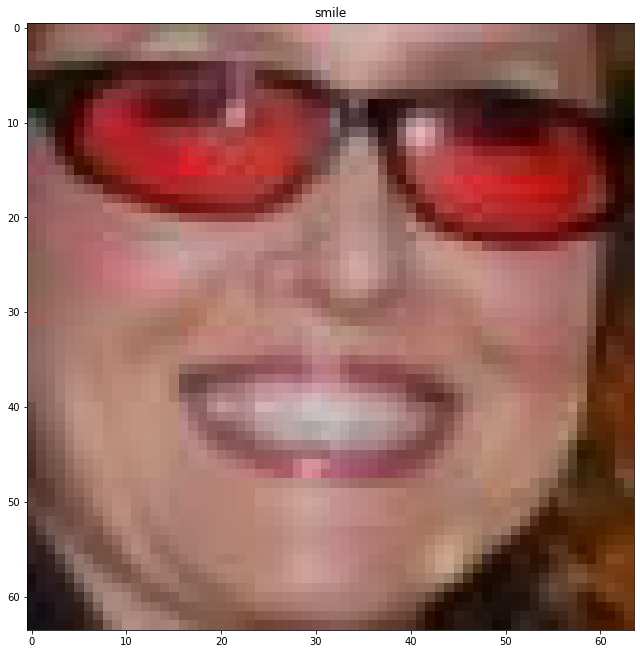

In [ ]:
import numpy as np
from skimage.color import rgb2lab, rgb2gray, lab2rgb
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

image_sample= imread('Melissa_Manchester_0001.jpg')
fig, ax = plt.subplots(figsize=(9, 16))
imshow(image_sample, ax=ax)
ax.set_title('smile')

Text(0.5, 1.0, 'non_smile')

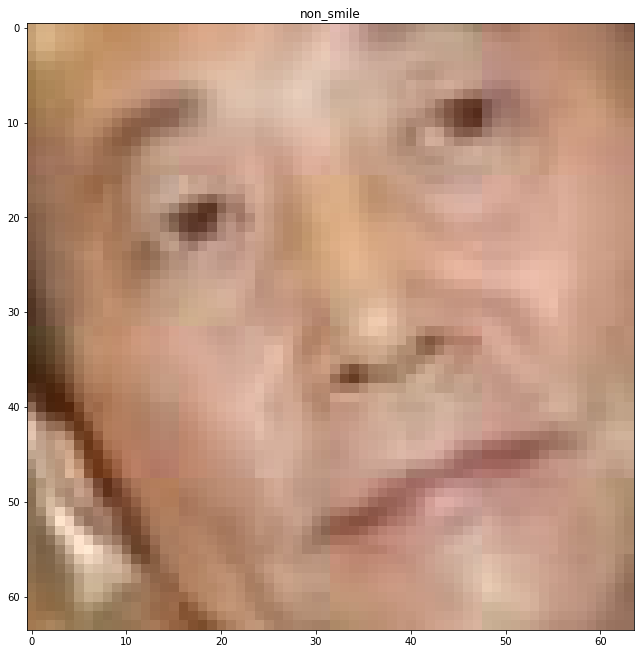

In [ ]:
image_sample2= imread('non_smile/Goh_Kun_0001.jpg')
fig, ax = plt.subplots(figsize=(9, 16))
imshow(image_sample2, ax=ax)
ax.set_title('non_smile')

In [ ]:
image_sample2.shape

(64, 64, 3)

In [ ]:
cd /

/


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam

train_gen = ImageDataGenerator(
        rescale=1./255,         
        rotation_range=40,      
        width_shift_range=0.2,  
        height_shift_range=0.2, 
        shear_range=0.2,        
        zoom_range=0.2,         
        horizontal_flip=True, )

train = train_gen.flow_from_directory(directory='../content/data/',
                                              target_size=(160, 185),
                                              color_mode='rgb',       
                                              class_mode='categorical', 
                                              batch_size=20,
                                              shuffle=True)

valid_gen = ImageDataGenerator(
        rescale=1./255        
    )

test = valid_gen.flow_from_directory(directory='../content/drive/MyDrive/data/test',
                                              target_size=(160, 185),  
                                              color_mode='rgb',       
                                              class_mode='categorical', # class_mode='binary',
                                              batch_size=3,
                                              shuffle=True)

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(160, 185, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

model.fit_generator(train, validation_data = test, epochs=5 )

FileNotFoundError: ignored